### Contents
    01. Installing libraries and data
    02. Creating bar charts
    03. Creating histograms and scatterplots
    04. Sampling & Creating line charts
    05. Export
    

# Import Libraries 

In [68]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Import Data

In [2]:
# Set path 
path=r'/Users/aylaarreguin/07-15-2020 Instacart Basket Analysis/'

In [3]:
# Import latest version of ords_prods_merged as df 
ords_prods_merge = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'ords_prods_merged_flags.pkl'))

# Bar Charts

<AxesSubplot:>

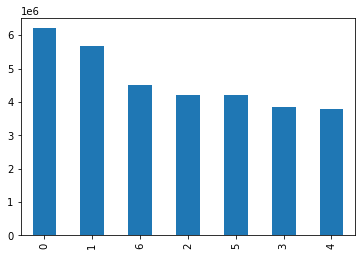

In [4]:
# Creating a bar chart with the 'orders_day_of_week' column 
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

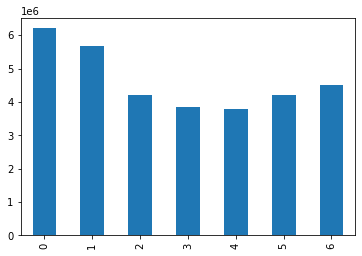

In [5]:
# Change the bars so they are in order of the week rather than largest to smallest 
bar= ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

This same trick can actually be used when printing frequencies, as well:

In [6]:
ords_prods_merge['orders_day_of_week'].value_counts()

0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: orders_day_of_week, dtype: int64

In [7]:
ords_prods_merge['orders_day_of_week'].value_counts().sort_index()

0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: orders_day_of_week, dtype: int64

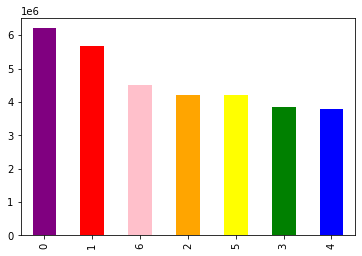

In [16]:
# Change the colors of the bars and store the figure under "bar" so the graph can be recalled in the future 
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar (color =['purple','red','pink','orange','yellow','green','blue'])                                                                         

In [17]:
# export it outside of Jupyter in the form of an image file. This can be done via the figure.savefig() function
bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_orders_dow.png'))

# Histograms

<AxesSubplot:ylabel='Frequency'>

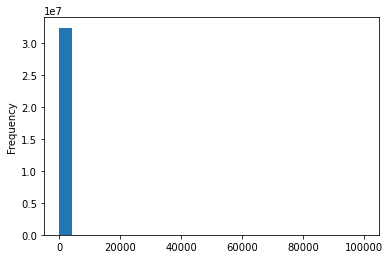

In [18]:
# creating a histogram of the “prices” column
ords_prods_merge['prices'].plot.hist(bins = 25)

Something doesn’t seem right here. You should have gotten 25 bars (one for each bin). Instead, however, you’ve gotten one single column. The reason for this has a lot to do with the data prep stage.

In [19]:
# Lets check the 'prices' column 
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

Notice the max value looks strange. Excessively large 

In [20]:
# Run more checks on the column to further investigate 
ords_prods_merge['prices'].mean()

11.980225638467232

In [22]:
ords_prods_merge['prices'].median()

7.4

In [23]:
ords_prods_merge['prices'].max()

99999.0

It makes no sense that most of the values would be between 7.4 and 11.9 and the max would be so large.
This is what is breaking the histogram. This must be the result of data corruption or some kind of special value within the data. An extreme value of 99,999 is forcing your histogram to shove all the small values into one bar and the extreme value in another one. And this second bar is so tiny that you can’t even see it on the chart. Hence, the one-column histogram you saw above

<AxesSubplot:xlabel='prices', ylabel='prices'>

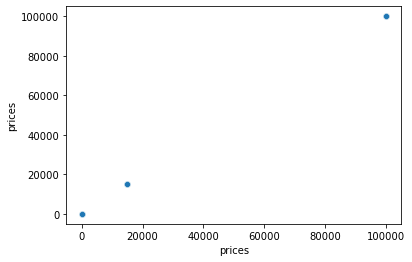

In [24]:
# use scatterplots to visualize the distribution of data points in order to identify any outliers
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

The mean of the column is around 12, so you’d expect the data points to be distributed somewhere around this number. However, there are two data points far, far beyond values you’d ever expect—values close to 20,000 and even 100,000.

 #Perform further checks to investigate outliers 

determine whether there are any values above a certain threshold in your data, for instance, anything above the “normal” price of a supermarket item. If you imagined the maximum price anyone would pay in a supermarket were around $100, then anything above that amount could be considered an outlier

In [25]:
# Test to see if there are any values above $100 in the supermarket 
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,customer_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0,...,_merge,Busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_order_price,spending_flag,order_frequency,frequency_flag
10030345,912404,17,12,2,14,5.0,21553,5,0,21554,...,both,Regularly_busy,Regularly_busy,Most Orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030346,603376,17,22,6,16,4.0,21553,3,1,21554,...,both,Regularly_busy,Regularly_busy,Most Orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030347,3264360,135,2,2,21,13.0,21553,6,0,21554,...,both,Regularly_busy,Regularly_busy,Fewest Orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030348,892534,135,3,0,8,12.0,21553,3,1,21554,...,both,Busiest_day,Busiest_days,Fewest Orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030349,229704,342,8,1,19,30.0,21553,9,0,21554,...,both,Regularly_busy,Busiest_days,Fewest Orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,33664,1,0,33666,...,both,Busiest_day,Busiest_days,Fewest Orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166210,2363282,204099,31,0,9,2.0,33664,1,1,33666,...,both,Busiest_day,Busiest_days,Most Orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166211,3181945,204395,13,3,15,8.0,33664,25,0,33666,...,both,Regularly_busy,Least_busy_days,Most Orders,15,Regular customer,451.153540,High spender,5.0,Frequent customer
29166212,2486215,205227,7,3,20,4.0,33664,8,0,33666,...,both,Regularly_busy,Least_busy_days,Fewest Orders,12,Regular customer,1178.381871,High spender,12.0,Regular customer


In [26]:
# Mark the 5,127 outlier values as missing since they don’t make sense in terms of the other values in the column. (But in real life, you would consult client about what they want you to do with them)
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [29]:
# Check if it was successful 
ords_prods_merge['prices'].max()

25.0

perfect 

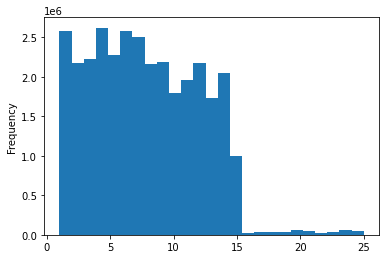

In [44]:
# Retry the original histogram now that adhoc cleaning is complete 
hist_1 = ords_prods_merge['prices'].plot.hist(bins = 25)

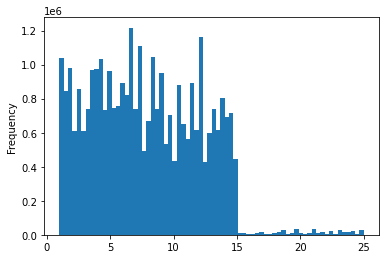

In [45]:
# increase the number of bins to, say, 70. This will result in a histogram with more, thinner columns:
hist_2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [46]:
# export it outside of Jupyter in the form of an image file. This can be done via the figure.savefig() function
hist_2.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'hist_prices.png'))

# Sampling Data & Line Charts

In [60]:
# 1: set the “seed.” 
# 2: Create a List called dev holding True/False values to the test np.random.rant () <= 0.7
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [61]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [62]:
# Store 70% of the sample in the dataframe big
big = ords_prods_merge[dev]

In [63]:
# Store 30% of the sample in the dataframe small 
small = ords_prods_merge[~dev]

In [64]:
# check that you’ve achieved the results you expected
len(ords_prods_merge)

32404859

In [65]:
len(big) + len(small)

32404859

It was successful! 

In [66]:
# reducing samples to columns only necessary for the chart: “prices” and “orders_day_of_week.
df_2 = small[['orders_day_of_week','prices']]

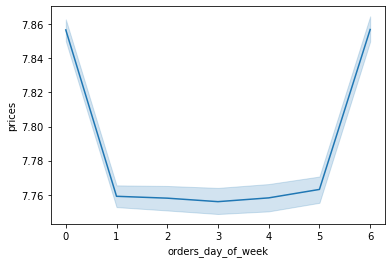

In [70]:
# Create the Line Chart 
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [71]:
# export it outside of Jupyter in the form of an image file. This can be done via the figure.savefig() function
line.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'line_prices_orders_dow.png'))